In [53]:
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy import stats

Public API for display tools in IPython.

https://ipython.org/ipython-doc/3/api/generated/IPython.display.html

In [2]:
import IPython.display as ipd

In [3]:
import librosa, librosa.display

Pretty midi: contains utility function/classes for handling MIDI data, so that it’s in a format from which it is easy to modify and extract information.

Colin Raffel and Daniel P. W. Ellis. Intuitive Analysis, Creation and Manipulation of MIDI Data with pretty_midi. In 15th International Conference on Music Information Retrieval Late Breaking and Demo Papers, 2014.

https://colinraffel.com/publications/ismir2014intuitive.pdf

http://craffel.github.io/pretty-midi/

In [4]:
import pretty_midi

In [9]:
sr

22050

Ejemplo de uso para analizar, manipular y sintetizar formato MIDI

In [7]:
Data_midi = pretty_midi.PrettyMIDI('/home/echeveste/Mis_trabajos/analisis_datos/maestro-v1.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi')

In [23]:
#Estima el tempo global 
print (Data_midi.estimate_tempo())
total_velocity = sum(sum(Data_midi.get_chroma()))

197.84327821710903


## get_chroma:

Get the MIDI data as a sequence of chroma vectors.

#### Cromagram Definition:

The underlying observation is that humans perceive two musical pitches as similar in color if they differ by an octave.

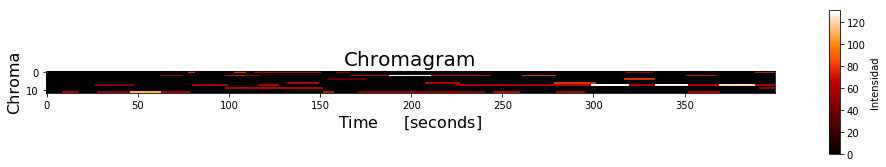

In [24]:
#Chromagram obtained from the audio recording.
plt.figure(figsize=(15,20))
plt.imshow(Data_midi.get_chroma(fs=100)[:,100:500],cmap=plt.cm.gist_heat)
plt.title('Chromagram',fontsize = 20)
plt.ylabel('Chroma',fontsize = 16)
plt.xlabel('Time $\quad$ [seconds]',fontsize = 16)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.45, 0.01, 0.1])
plt.colorbar(cax=cax,label='Intensidad')
plt.show()

Para ver lista de instrumentos vamos a la siguiente página:

https://www.midi.org/specifications/item/gm-level-1-sound-set

In [85]:
# Creamos un objeto PrettyMIDI:
My_Chord = pretty_midi.PrettyMIDI()

#Seleccionamos Instrumento (1 -> piano) : 
My_instrument = pretty_midi.Instrument(program = 1)

# Iterate over note names, which will be converted to note number later
for notas in ['C5', 'E5', 'G5']:
    # Pasamos la nota al número de nota para MIDI
    num_nota = pretty_midi.note_name_to_number(notas)
    # Creamos la nota, comienza en 0s y termina en at 2.5s
    note = pretty_midi.Note(velocity=100, pitch=num_nota, start=0, end=2.5)
    # Agregamos la nota a nuestro instrumento 
    My_instrument.notes.append(note)

# Add the cello instrument to the PrettyMIDI object
My_Chord.instruments.append(My_instrument)
# Write out the MIDI data
My_Chord.write('cello-C-chord.mid')

Transformamos el archivo MIDI a uno WAVE con "timidity cello-C-chord.mid -Ow" desde la terminal.

In [101]:
x, sr = librosa.load('cello-C-chord.wav')
ipd.Audio(x, rate=sr)

In [21]:
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
ipd.Audio(data,rate=framerate)

In [19]:
dataleft = np.sin(2*np.pi*220*t)
dataright = np.sin(2*np.pi*224*t)
ipd.Audio([dataleft, dataright],rate=framerate)

In [13]:
ipd.Audio("http://www.nch.com.au/acm/8k16bitpcm.wav")